 # Project On Heart Failure Prediction.
 ## Submitted to :- EICT Academy,IIT Roorkee.
 ### Submitted by :- Nikhil Laxman Palve.
### Mob.No:- 9922995092
### Mail:- nikpalve@gmail.com

### OBJECTIVE

- To create a classification filter (Using Logistics Regression & KNN Classification Algorithm) to
  predict Heart Failure. 
- Compare the performance of the filter .


    
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide. 
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.
Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.
People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk  factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and  management wherein a machine learning model can be of great help.
    
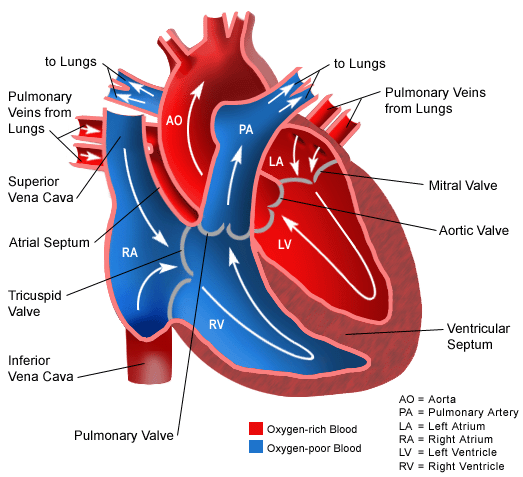
    
 ## Dataset Link 
 
 https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
 
 ## Dataset Description
 
 Feature | Explanation | Measurement	| Range
------------- | ------------- |------------- | -------------
Age	|Age of the patient	|Years |	[40,..., 95]
Anaemia	|Decrease of red <br> blood cells or hemoglobin |	Boolean|	0, 1
High blood pressure |	If a patient has hypertension |	Boolean	 |0, 1
Creatinine phosphokinase<br>(CPK) |	Level of the CPK enzyme <br>in the blood |	mcg/L|	[23,..., 7861]
Diabetes|	If the patient has diabetes |	Boolean	| 0, 1
Ejection fraction|	Percentage of blood leaving<br>the heart at each contraction|Percentage	|	[14,..., 80]
Sex	| Woman or man |	Binary|	0, 1
Platelets|	Platelets in the blood|	kiloplatelets/mL|	[25.01,..., 850.00]
Serum creatinine|	Level of creatinine in the blood|	mg/dL|	[0.50,..., 9.40]
Serum sodium|	Level of sodium in the blood|	mEq/L|	[114,..., 148]
Smoking|	If the patient smokes|	Boolean	|0, 1
Time|	Follow-up period|	Days|	[4,...,285]
DEATH EVENT<br>(TARGET)|	If the patient died during the follow-up period|	Boolean|	0, 1

**NOTE: mcg/L: micrograms per liter. mL: microliter. mEq/L: milliequivalents per litre**
 
 ## References
 
    Machine learning can predict survival of patients with heart failure from serum creatinine and 
    ejection fraction alone. (03 February 2020)
   https://doi.org/10.1186/s12911-020-1023-5

## Required Libraries

**Import the required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

## Import Data

 **loading the csv data to a Pandas DataFrame**

In [2]:
heart_faliure_data =pd.read_csv('C:\\Users\\nikhil\\Desktop\\project\\heart_failure_clinical_records.csv')

In [3]:
heart_faliure_data

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

## Pandas Profiling Report


In [96]:
from pandas_profiling import ProfileReport
profile = ProfileReport(heart_faliure_data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**print first 5 rows of the dataset**

In [5]:
heart_faliure_data.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

**print last 5 rows of the dataset**

In [6]:
heart_faliure_data.tail()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
294                    1   155000.0               1.1           143    1   
295                    0   270000.0               1.2           139    0   
296                    0   742000.0               0.8           138    0   
297                    0   140000.0               1.4           140    1   
298                    0   395000.0               1.6           136    1   

     smoking  time  DEATH_EVENT  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0

**number of rows and columns in the dataset**

In [7]:
heart_faliure_data.shape

(299, 13)

**getting some info about the data**

In [8]:
heart_faliure_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**Check the total missing values in each column**

In [9]:
print("Total NULL Values in each columns")
print("*********************************")
print(heart_faliure_data.isnull().sum())

Total NULL Values in each columns
*********************************
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


***This looks to be a clean dataset without any missing values...***

 **statistical measures about the data**


In [10]:
heart_faliure_data.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

**checking the distribution of Target Variable**

In [11]:
heart_faliure_data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

**1 --> Defective Heart**

**0 --> Healthy Heart**

## Data Visualization

**HeatMap**

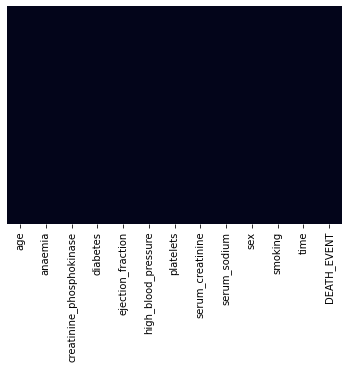

In [12]:
sns.heatmap(heart_faliure_data.isnull(),cbar=False,yticklabels=False)
plt.show()

**distribution of classes**

living cases - 203
died cases - 96


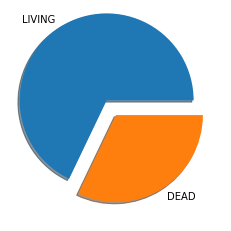

In [13]:
len_live = len(heart_faliure_data["DEATH_EVENT"][heart_faliure_data.DEATH_EVENT == 0])
len_death = len(heart_faliure_data["DEATH_EVENT"][heart_faliure_data.DEATH_EVENT == 1])

arr = np.array([len_live, len_death])
labels = ['LIVING', 'DEAD']
print("living cases -", len_live)
print("died cases -", len_death)

plt.pie(arr, labels=labels, explode=[0.2, 0.0], shadow=True)
plt.show()

**distribution of age**

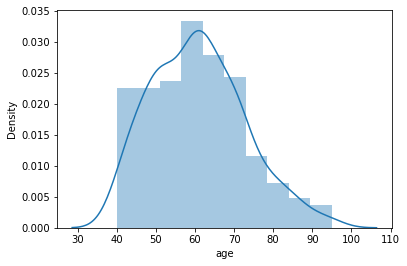

In [14]:
sns.distplot(heart_faliure_data["age"])
plt.show()

**selecting rows that are above age 50 and seeing died or not**

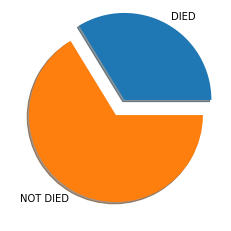

Total no. of died cases,  85
Total no. of not died cases,  167


In [15]:
age_above_50_not_died = heart_faliure_data['DEATH_EVENT'][heart_faliure_data.age >= 50][heart_faliure_data.DEATH_EVENT == 0]
age_above_50_died = heart_faliure_data['DEATH_EVENT'][heart_faliure_data.age >= 50][heart_faliure_data.DEATH_EVENT == 1]  

len_died = len(age_above_50_died) 
len_not_died = len(age_above_50_not_died) 

arr1 = [len_died, len_not_died] 
labels = ['DIED', 'NOT DIED'] 

plt.pie(arr1, labels=labels, explode = [0.2,0.0] , shadow=True) 
plt.show()  

print ("Total no. of died cases, ", len_died) 
print("Total no. of not died cases, ", len_not_died)

**Died with Diabetes VS Not Died with Diabetes**

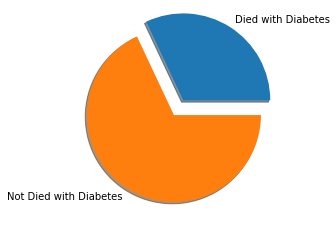

In [16]:
patient_nhave_diabetes_0 = heart_faliure_data['DEATH_EVENT'][heart_faliure_data.diabetes == 1][heart_faliure_data.DEATH_EVENT == 0] 
patient_have_diabetes_1 = heart_faliure_data['DEATH_EVENT'][heart_faliure_data.diabetes == 1][heart_faliure_data.DEATH_EVENT == 1]

len_d_died = len(patient_have_diabetes_1) 
len_d_alive = len(patient_nhave_diabetes_0) 

arr2 = [len_d_died,len_d_alive] 
labels = ['Died with Diabetes', "Not Died with Diabetes"] 
plt.pie(arr2, labels=labels, explode = [0.2,0.0] , shadow=True) 
plt.show() 

**Checking distribution of data**

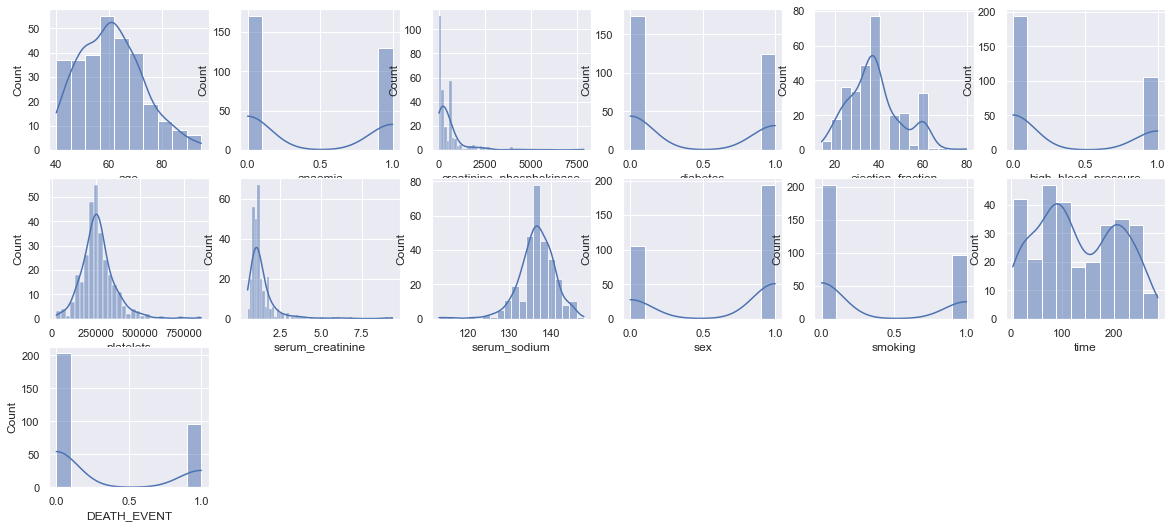

In [17]:
plt.figure(figsize = (20, 15))
sns.set(style="darkgrid")
plotnumber = 1

for column in heart_faliure_data:
    if plotnumber <=13 :
        ax = plt.subplot(5, 6, plotnumber)
        sns.histplot(heart_faliure_data[column],kde=True)
        plt.xlabel(column)
        
    plotnumber += 1
plt.show()

## Data Modelling

 **Feature Correlation**

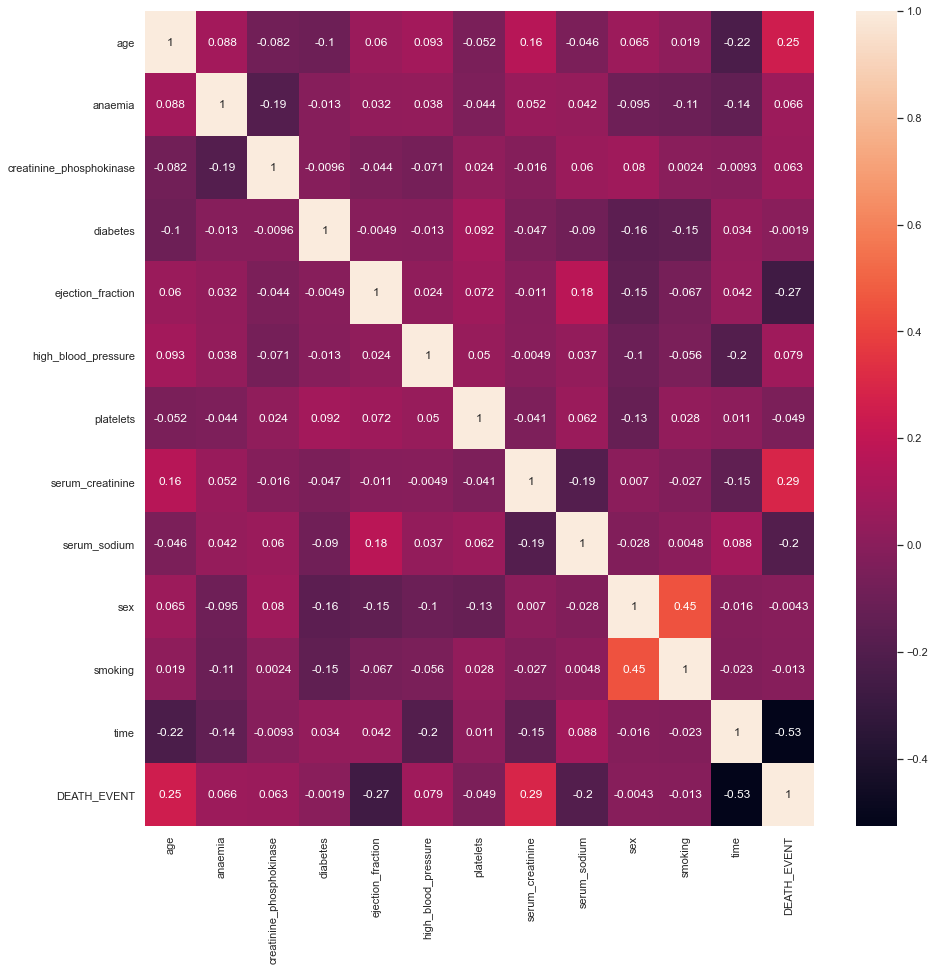

In [18]:
correlation = heart_faliure_data.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(correlation, annot=True)
plt.show()

In [19]:
heart_faliure_data.corr().style.background_gradient(cmap='coolwarm')

## Splitting the Features and Target

In [20]:
X =heart_faliure_data[['age','ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']]
Y = heart_faliure_data['DEATH_EVENT']

In [21]:
X

age  ejection_fraction  serum_creatinine  serum_sodium  time
0    75.0                 20               1.9           130     4
1    55.0                 38               1.1           136     6
2    65.0                 20               1.3           129     7
3    50.0                 20               1.9           137     7
4    65.0                 20               2.7           116     8
..    ...                ...               ...           ...   ...
294  62.0                 38               1.1           143   270
295  55.0                 38               1.2           139   271
296  45.0                 60               0.8           138   278
297  45.0                 38               1.4           140   280
298  50.0                 45               1.6           136   285

[299 rows x 5 columns]

In [22]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

## Splitting the Data into Training data & Test Data

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
print("Shape of the X_train", X_train.shape) 
print("Shape of the y_train", Y_train.shape) 
print("Shape of the X_test", X_test.shape) 
print("Shape of the y_test", Y_test.shape)

Shape of the X_train (209, 5)
Shape of the y_train (209,)
Shape of the X_test (90, 5)
Shape of the y_test (90,)


## Model 1 Training

**Logistic Regression**

In [24]:
LR=LogisticRegression()

**Training the LogisticRegression model with Training data**


In [25]:
LR.fit(X_train, Y_train)
LR_pred = LR.predict(X_test)

## Model Evaluation

**confusion matrix**

In [26]:
CM_LR=confusion_matrix(Y_test,LR_pred)

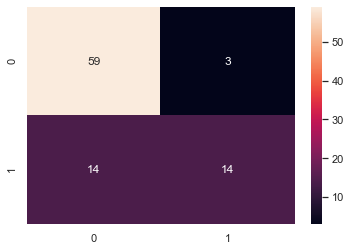

In [27]:
sns.heatmap(CM_LR,annot=True)
plt.show()

**Accuracy Score**

**accuracy on training data**


In [28]:
LR_X_train_prediction = LR.predict(X_train)
LR_training_data_accuracy = accuracy_score(LR_X_train_prediction, Y_train)

In [29]:
print('Accuracy on Training data : ',LR_training_data_accuracy)

Accuracy on Training data :  0.8373205741626795


In [30]:
print('Accuracy on Training data : ',100*0.8373205741626795)

Accuracy on Training data :  83.73205741626795


**accuracy on test data**


In [31]:
LR_X_test_prediction = LR.predict(X_test)
LR_test_data_accuracy = accuracy_score(LR_X_test_prediction, Y_test)

In [32]:
print('Accuracy on Test data : ', LR_test_data_accuracy)

Accuracy on Test data :  0.8111111111111111


In [33]:
print('Accuracy on Test data : ', 100*0.8111111111111111)

Accuracy on Test data :  81.11111111111111


In [34]:
print(classification_report(Y_test,LR_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87        62
           1       0.82      0.50      0.62        28

    accuracy                           0.81        90
   macro avg       0.82      0.73      0.75        90
weighted avg       0.81      0.81      0.80        90



## Model 2 Training

**KNeighborsClassifier**

In [35]:
KNN=KNeighborsClassifier(n_neighbors=15)

**Training the KNeighborsClassifier model with Training data**

In [36]:
KNN.fit(X_train, Y_train)
KNN_pred = KNN.predict(X_test)

## Model Evaluation

**confusion matrix**

In [37]:
CM_KNN=confusion_matrix(Y_test,KNN_pred)

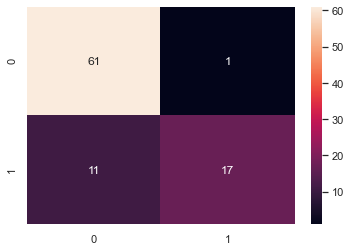

In [38]:
sns.heatmap(CM_KNN,annot=True)
plt.show()

**Accuracy Score**

**accuracy on training data**

In [39]:
KNN_X_train_prediction = KNN.predict(X_train)
KNN_training_data_accuracy = accuracy_score(KNN_X_train_prediction, Y_train)

In [40]:
print('Accuracy on Training data : ', KNN_training_data_accuracy)

Accuracy on Training data :  0.8516746411483254


In [41]:
print('Accuracy on Training data : ',100*0.8516746411483254)

Accuracy on Training data :  85.16746411483254


**accuracy on test data**

In [42]:
KNN_X_test_prediction = KNN.predict(X_test)
KNN_test_data_accuracy = accuracy_score(KNN_X_test_prediction, Y_test)

In [43]:
print('Accuracy on Test data : ', KNN_test_data_accuracy)

Accuracy on Test data :  0.8666666666666667


In [44]:
print('Accuracy on Training data : ', 100*0.8666666666666667)

Accuracy on Training data :  86.66666666666667


In [45]:
print(classification_report(Y_test,KNN_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        62
           1       0.94      0.61      0.74        28

    accuracy                           0.87        90
   macro avg       0.90      0.80      0.82        90
weighted avg       0.88      0.87      0.86        90



## Model 3 Training

**Decision Tree**

In [46]:
DT=DecisionTreeClassifier()

**Training the DecisionTreeClassifier model with Training data**

In [47]:
DT.fit(X_train, Y_train)
DT_pred = DT.predict(X_test)

## Model Evaluation

**confusion matrix**

In [48]:
CM_DT=confusion_matrix(Y_test,DT_pred)

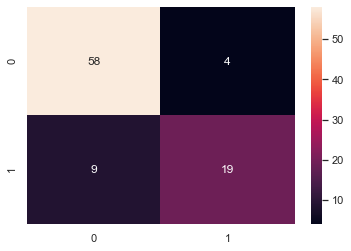

In [49]:
sns.heatmap(CM_DT,annot=True)
plt.show()

**Accuracy Score**

**accuracy on training data**

In [50]:
DT_X_train_prediction = DT.predict(X_train)
DT_training_data_accuracy = accuracy_score(DT_X_train_prediction, Y_train)

In [51]:
print('Accuracy on Training data : ', DT_training_data_accuracy)

Accuracy on Training data :  1.0


In [52]:
print('Accuracy on Training data : ', 1.0*100)

Accuracy on Training data :  100.0


**accuracy on test data**

In [53]:
DT_X_test_prediction = DT.predict(X_test)
DT_test_data_accuracy = accuracy_score(DT_X_test_prediction, Y_test)

In [54]:
print('Accuracy on Test data : ',DT_test_data_accuracy)

Accuracy on Test data :  0.8555555555555555


In [55]:
print('Accuracy on Training data : ', 100*0.8333333333333334)

Accuracy on Training data :  83.33333333333334


In [56]:
print(classification_report(Y_test,DT_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90        62
           1       0.83      0.68      0.75        28

    accuracy                           0.86        90
   macro avg       0.85      0.81      0.82        90
weighted avg       0.85      0.86      0.85        90



## Model 4 Training

**Random Forest**

In [57]:
RF=RandomForestClassifier()

**Training the RandomForestClassifier model with Training data**

In [58]:
RF.fit(X_train, Y_train)
RF_pred = RF.predict(X_test)

## Model Evaluation

**confusion matrix**

In [59]:
CM_RF=confusion_matrix(Y_test,RF_pred)

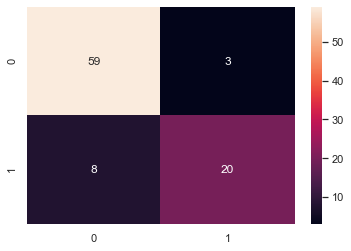

In [60]:
sns.heatmap(CM_RF,annot=True)
plt.show()

**Accuracy Score**

**accuracy on training data**

In [61]:
RF_X_train_prediction = RF.predict(X_train)
RF_training_data_accuracy = accuracy_score(RF_X_train_prediction, Y_train)

In [62]:
print('Accuracy on Training data : ', RF_training_data_accuracy)

Accuracy on Training data :  1.0


In [63]:
print('Accuracy on Training data : ', 100*1.0)

Accuracy on Training data :  100.0


**accuracy on test data**

In [64]:
RF_X_test_prediction = RF.predict(X_test)
RF_test_data_accuracy = accuracy_score(RF_X_test_prediction, Y_test)

In [65]:
print('Accuracy on Test data : ',RF_test_data_accuracy)

Accuracy on Test data :  0.8777777777777778


In [66]:
print('Accuracy on Test data : ',0.8555555555555555*100)

Accuracy on Test data :  85.55555555555556


In [67]:
print(classification_report(Y_test,RF_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        62
           1       0.87      0.71      0.78        28

    accuracy                           0.88        90
   macro avg       0.88      0.83      0.85        90
weighted avg       0.88      0.88      0.87        90



## Model 5 Training

**Support Vector Machine**

In [68]:
SVC=SVC()

**Training the Support Vector Machine model with Training data**

In [69]:
SVC.fit(X_train, Y_train)
SVC_pred = SVC.predict(X_test)

## Model Evaluation

**confusion matrix**

In [70]:
CM_SVC=confusion_matrix(Y_test,SVC_pred)

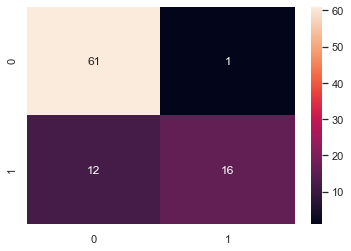

In [71]:
sns.heatmap(CM_SVC,annot=True)
plt.show()

**Accuracy Score**

**accuracy on training data**

In [72]:
SVC_X_train_prediction = SVC.predict(X_train)
SVC_training_data_accuracy = accuracy_score(SVC_X_train_prediction, Y_train)

In [73]:
print('Accuracy on Training data : ', SVC_training_data_accuracy)

Accuracy on Training data :  0.8421052631578947


In [74]:
print('Accuracy on Test data : ',100* 0.8421052631578947)

Accuracy on Test data :  84.21052631578947


**accuracy on test data**

In [75]:
SVC_X_test_prediction = SVC.predict(X_test)
SVC_test_data_accuracy = accuracy_score(SVC_X_test_prediction, Y_test)

In [76]:
print('Accuracy on Test data : ',SVC_test_data_accuracy)

Accuracy on Test data :  0.8555555555555555


In [77]:
print('Accuracy on Test data : ',100*0.8555555555555555)

Accuracy on Test data :  85.55555555555556


In [78]:
print(classification_report(Y_test,SVC_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90        62
           1       0.94      0.57      0.71        28

    accuracy                           0.86        90
   macro avg       0.89      0.78      0.81        90
weighted avg       0.87      0.86      0.84        90



## Model 5 Training

**Naive Bayes**

In [79]:
NB = GaussianNB()

**Training the Support Vector Machine model with Training data**

In [80]:
NB.fit(X_train, Y_train)
NB_pred = NB.predict(X_test)

## Model Evaluation

**confusion matrix**

In [81]:
CM_NB=confusion_matrix(Y_test,NB_pred)

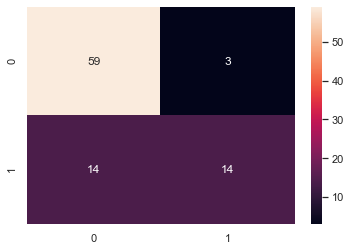

In [82]:
sns.heatmap(CM_NB,annot=True)
plt.show()

**Accuracy Score**

**accuracy on training data**

In [83]:
NB_X_train_prediction = NB.predict(X_train)
NB_training_data_accuracy = accuracy_score(NB_X_train_prediction, Y_train)

In [84]:
print('Accuracy on Training data : ', NB_training_data_accuracy)

Accuracy on Training data :  0.8181818181818182


In [85]:
print('Accuracy on Test data : ',100*0.8181818181818182)

Accuracy on Test data :  81.81818181818183


**accuracy on test data**

In [86]:
NB_X_test_prediction = NB.predict(X_test)
NB_test_data_accuracy = accuracy_score(NB_X_test_prediction, Y_test)

In [87]:
print('Accuracy on Test data : ',NB_test_data_accuracy)

Accuracy on Test data :  0.8111111111111111


In [88]:
print('Accuracy on Test data : ',100*0.8111111111111111)

Accuracy on Test data :  81.11111111111111


In [89]:
print(classification_report(Y_test,NB_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87        62
           1       0.82      0.50      0.62        28

    accuracy                           0.81        90
   macro avg       0.82      0.73      0.75        90
weighted avg       0.81      0.81      0.80        90



## Building a Predictive System For Logistic Regression

In [90]:
input_data = (82,1,379,0,50)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = LR.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


### Building a Predictive System For KNeighborsClassifier

In [91]:
input_data = (82,1,379,0,50)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = KNN.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


### Comparison Between Logistic Regression & KNeighborsClassifier

In [92]:
list_1 = list(["LogisticRegression","KNN"])
list_2 = list([84,86])

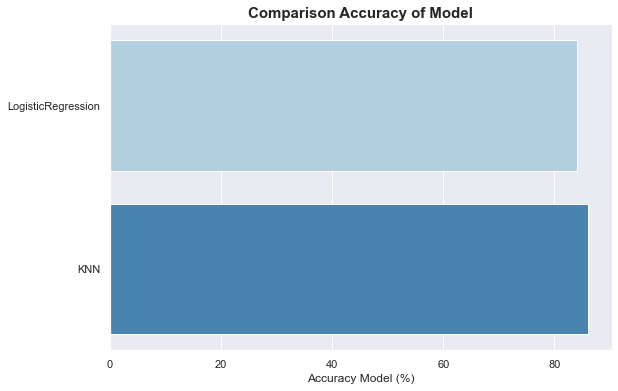

In [93]:
plt.figure(figsize=(9,6))
sns.barplot(x=list_2,y=list_1,palette="Blues")
plt.title('Comparison Accuracy of Model', fontsize=15, fontweight='bold')
plt.xlabel('Accuracy Model (%)')
plt.ylabel('')
plt.show()

In [94]:
data={"LogisticRegression":["84"],"KNN":[" 86"]}
score=pd.DataFrame(data)

In [95]:
score

LogisticRegression  KNN
0                 84   86

**Conclusion**

- KNN is best choice of 2 models because accuracy score 86% 
- So, Finally I conclude by saying that, this project Disease prediction using machine learning is     very much useful in everyone’s day to day life and it is mainly more important for the healthcare     sector, because they are the one that daily uses these systems to predict the diseases of the         patients based on their general information and there symptoms that they are been through.
- Now a day’s health industry plays major role in curing the diseases of the patients so this is also   some kind of help for the health industry to tell the user and also it is useful for the user in     case he/she doesn’t want to go to the hospital or any other clinics, 
- so just by entering the symptoms a nd all other useful information the user can get to know the        disease he/she is suffering from and the health industry can also get benefit from this system by    just asking the symptoms from the user and entering in the system and in just few seconds they can    tell the exact and up to some extent the accurate diseases. 
- If health industry adopts this project then the work of the doctors can be reduced and they can       easily predict the disease of the patient. 
- The Disease prediction is to provide prediction for the various and generally occurring diseases     that when unchecked and sometimes ignored can turns into fatal disease and cause lot of problem to   the patient and as well as their family members.